In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

In [7]:
# ## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

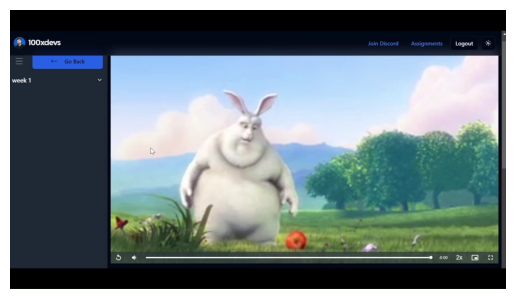

In [8]:
cap = cv2.VideoCapture("main_edited_copy_2.mp4")
cap2 = cv2.VideoCapture("frame_1_edited.mp4")
ret, frame1 = cap.read()
ret, frame2 = cap2.read()
# Convert BGR to RGB
frame_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(frame_rgb)
plt.axis('off')  # Turn off axis
plt.show()

In [9]:
def highlight_frame_differences(frame1, frame2):
    # Compute absolute difference between the frames
    threshold=3
    significant_change_threshold=0.005
    diff = cv2.absdiff(frame1, frame2)
    
    blur_kernel_size=(5, 5)
    blurred_diff = cv2.GaussianBlur(diff, blur_kernel_size, 0)
    
    # Enhance the differences for better visualization
    _, diff_highlighted = cv2.threshold(blurred_diff, threshold, 255, cv2.THRESH_BINARY)

    # Calculate the proportion of pixels that have significant differences
    num_significant_pixels = np.sum(diff_highlighted == 255)
    print(num_significant_pixels, "num_significant_pixels")
    total_pixels = frame1.size
    change_proportion = num_significant_pixels / total_pixels
    
    # Determine if the change is significant
    is_significant_change = change_proportion > significant_change_threshold
    
    return diff_highlighted, is_significant_change
    
    # return diff

In [10]:
def compareFrameChanges(frame1, frame2):
    threshold=3
    significant_change_threshold=0.005
    diff = cv2.absdiff(frame1, frame2)
    
    blur_kernel_size=(5, 5)
    blurred_diff = cv2.GaussianBlur(diff, blur_kernel_size, 0)
    
    # Enhance the differences for better visualization
    _, diff_highlighted = cv2.threshold(blurred_diff, threshold, 255, cv2.THRESH_BINARY)

    # Calculate the proportion of pixels that have significant differences
    num_significant_pixels = np.sum(diff_highlighted == 255)
    # print(num_significant_pixels, "num_significant_pixels")
    total_pixels = frame1.size
    change_proportion = num_significant_pixels / total_pixels
    
    # Determine if the change is significant
    is_significant_change = change_proportion > significant_change_threshold
    
    return is_significant_change

In [11]:
from PIL import Image
import imagehash

def compute_frame_phash(gray_frame):
    # Convert frame to grayscale
    # gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    # blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
    
    # # Resize frame to a smaller size
    # resized_frame = cv2.resize(blurred_frame, (256, 256))  # Adjust size as needed
    
    # Convert to PIL Image
    pil_image = Image.fromarray(gray_frame)
    
    # Compute perceptual hash
    phash = imagehash.phash(pil_image, hash_size=16, highfreq_factor=6)
    # return str(phash)
    return phash

In [12]:
def preprocess_frame(frame, blur_kernel_size=(5, 5)):
    """Preprocess the frame by converting to grayscale and applying Gaussian blur."""
    try:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    except cv2.error as e:
        print(f"Error converting frame to grayscale: {e}")
        print(f"Frame shape: {frame.shape}, Frame type: {type(frame)}")
        return None
    
    frame = cv2.GaussianBlur(frame, blur_kernel_size, 0)

    return frame

In [13]:
import cv2
import hashlib

def get_frame_hashes(video_path):
    cap = cv2.VideoCapture(video_path)
    hash_digests = []
    strings = []
    phash=[]
    frames=[]

    fps = cap.get(cv2.CAP_PROP_FPS)
    print(f'FPS : {fps:0.2f}')

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = preprocess_frame(frame)
        frames.append(frame)
        # size = sys.getsizeof(frame)
        # print(size/ (1024 * 1024))
        phash.append(compute_frame_phash(frame))
        # gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        hash_object = hashlib.md5(frame.tobytes())
        # hash_object = hashlib.md5(frame.tobytes())
        hash_digest = hash_object.hexdigest()
        hash_digests.append(hash_digest)
        # hash_digests.append(frame)

    cap.release()
    return hash_digests, strings, phash, frames

In [14]:
hash_digests1, strings1, phash1, frames1 = get_frame_hashes('main_edited_copy_2.mp4')
# hash_digests1, strings1, phash1, frames1 = get_frame_hashes('3_frames_edited.mp4')
# len(hash_digests1)

FPS : 30.00


In [15]:
# hash_digests2, strings2, phash2, frames2 = get_frame_hashes('frame_1_edited.mp4')
# hash_digests2, strings2, phash2, frames2 = get_frame_hashes('2_frames_edited.mp4')
# hash_digests2, strings2, phash2, frames2 = get_frame_hashes('added_15_frames.mp4')
hash_digests2, strings2, phash2, frames2 = get_frame_hashes('deleted_15_frames.mp4')
# hash_digests2, strings2, phash2, frames2 = get_frame_hashes('main_edited_copy_2.mp4')

FPS : 30.00


In [16]:
def is_significantly_different(hash1, hash2, threshold=5):
    return hash1 - hash2 > threshold

In [17]:
# for i in range(len(phash1)):
#     currphash1=phash1[i]
#     currphash2=phash2[i]
#     if is_significantly_different(currphash1, currphash2):
#         print("Timestamp: ", i/30)
#         for j in range(1,30):
#             newphash1=phash1[i+j]
#             if newphash1==currphash2:
#                 print(i, j, i+j)
            # if is_significantly_different(newphash1, currphash2):
            #     print(i+j)
        # print(i)
print(len(phash1), len(phash2))
i,j=0,0
deleted=[]
added=[]
while i<len(phash1) and j<len(phash2):
    currphash1=phash1[i]
    currphash2=phash2[j]
    if is_significantly_different(currphash1, currphash2):
        print("Timestamp: ", i/30)
        for k in range(1,60):
            if i + k >= len(phash1):
                break
            newphash1=phash1[i+k]
            if newphash1==currphash2:
                print(i, i+k, i/30, "-", (i+k)/30)
                deleted.append((i,i+k-1))
                i=i+k
                print(i/30)
                continue
        
        for k in range(1,60):
            if j + k >= len(phash2):
                break
            newphash2=phash2[j+k]
            if currphash1==newphash2:
                print(j, j+k, j/30, "-", (j+k)/30)
                added.append((j,j+k-1))
                j=j+k
                print(j/30)
                continue
    i+=1
    j+=1
print(deleted)
print(added)

685 670
Timestamp:  5.0
150 165 5.0 - 5.5
5.5
[(150, 164)]
[]


In [18]:
# new_length_of_streams=[]
previous_length_of_streams=[]
i=len(frames1)
while i>=0 and i//300!=0:
    previous_length_of_streams.append(300)
    i-=300

if i%300!=0:
    previous_length_of_streams.append(i%300)

print(previous_length_of_streams)

[300, 300, 85]


In [19]:
new_length_of_streams=previous_length_of_streams[:]

# For deleted Frames
for deletedFrame in deleted:
    start=deletedFrame[0]
    end=deletedFrame[1]

    index=start//300
    print(index, previous_length_of_streams[index])
    new_length_of_streams[index]-=end-start+1

print(new_length_of_streams)

0 300
[285, 300, 85]


In [20]:
# new_length_of_streams=previous_length_of_streams[:]

# For added frames
for addedFrame in added:
    start=addedFrame[0]
    end=addedFrame[1]

    index=start//300
    print(index, previous_length_of_streams[index])
    new_length_of_streams[index]+=end-start+1

print(new_length_of_streams)

[285, 300, 85]


In [33]:
import os
import subprocess

# Function to convert frames to time (seconds)
def frames_to_time(frame_count, fps):
    return round(frame_count / fps, 3)  # Round to 3 decimal places for better precision

# Function to generate HLS segment for each frame range
def generate_hls_segment(video_file, start_time, duration, output_dir, segment_num):
    segment_path = os.path.join(output_dir, f"segment_{segment_num}.ts").replace("\\", "/")
    
    # ffmpeg command to split and generate a single .ts file per segment
    cmd = [
        "ffmpeg",
        "-ss", str(start_time),  # Start time
        "-t", str(duration),     # Duration of the segment
        "-i", video_file,        # Input video file
        "-c", "copy",            # Copy video and audio streams without re-encoding
        "-f", "mpegts",          # Set output format to .ts
        segment_path             # Output .ts file
    ]
    
    # Run the commande
    try:
        subprocess.run(cmd, check=True)
        return segment_path
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")
        return None

# Function to generate a playlist for all segments
def generate_playlist(segment_durations, final_output_m3u8):
    with open(final_output_m3u8, 'w') as outfile:
        outfile.write('#EXTM3U\n')  # HLS playlist header
        
        for idx, duration in enumerate(segment_durations):
            # Add segment info to playlist
            outfile.write(f'#EXTINF:{duration},\n')
            outfile.write(f"segment_{idx}.ts\n")

# Main function to process the video based on frame ranges
def create_combined_hls_stream(video_file, frame_ranges, fps, output_dir, final_output_m3u8):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    start_frame = 0
    segment_durations = []

    # Loop through each frame range to create segments
    for idx, frame_count in enumerate(frame_ranges):
        start_time = frames_to_time(start_frame, fps)
        duration = frames_to_time(frame_count, fps)
        
        # Generate HLS segment for this frame range
        segment_path = generate_hls_segment(video_file, start_time, duration, output_dir, idx)
        
        if segment_path:
            segment_durations.append(duration)
        
        # Update the start frame for the next segment
        start_frame += frame_count

    # Generate a playlist with exact durations
    generate_playlist(segment_durations, final_output_m3u8)

# Example usage:
video_file = "deleted_15_frames.mp4"  # Your input video file
fps = 30  # Frames per second of the video
output_dir = "hls_output"  # Directory to store the HLS segments
final_output_m3u8 = os.path.join(output_dir, "final_playlist.m3u8").replace("\\", "/")

# Replace 'new_length_of_streams' with your actual frame ranges
frame_ranges = [285, 300, 85]

# Generate combined HLS stream
create_combined_hls_stream(video_file, frame_ranges, fps, output_dir, final_output_m3u8)

print(f"Combined HLS stream generated successfully: {final_output_m3u8}")


Combined HLS stream generated successfully: hls_output/final_playlist.m3u8


In [36]:
# Compare hashes
finalFrames=[]
# for i, (hash1, hash2) in enumerate(zip(phash1, phash2)):
#     if is_significantly_different(hash1, hash2):
#         print(i)
#         if compareFrameChanges(frames1[i], frames2[i]):
#             # print(i, hash1-hash2)
#             finalFrames.append(i)
# print(finalFrames)

i,j=0,0
while i<len(phash1) and j<len(phash2):
    for item in deleted:
        if item[0]<=i<=item[1]:
            i=item[1]+1
            break
    for item in added:
        if item[0]<=i<=item[1]:
            j=item[1]+1
            break
    hash1=phash1[i]
    hash2=phash2[j]
            
    if is_significantly_different(hash1, hash2):
        print(j)
        if compareFrameChanges(frames1[i], frames2[i]):
            # print(i, hash1-hash2)
            finalFrames.append(i)
    
    i+=1
    j+=1
    # if hash1 != hash2:
    #     highlighted_diff, isSignificant = highlight_frame_differences(frames1[i],frames2[i])
    #     # print(isSignificant)
    #     if isSignificant:
    #         print(i)
    #         print("----------------")

In [23]:
for item in deleted:
    part=item[1]//300+1
    print(part, "size= ", 10-(item[1]-item[0])/30)

1 size=  9.533333333333333


3840 num_significant_pixels
There are values greater than 0 in the array.
Count of values greater than 0: 3840
87c1a754783e48ae722ab7734db6a7d98349854685b3810dc851724b3dbe7cb9 87c1a754783e48ae722ab7734db6a7d98349854685b3810dc851724b3dbe7cb9 0 False


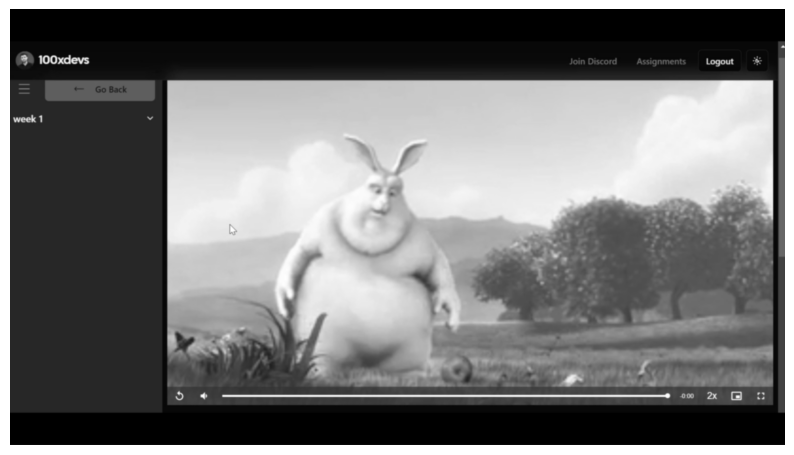

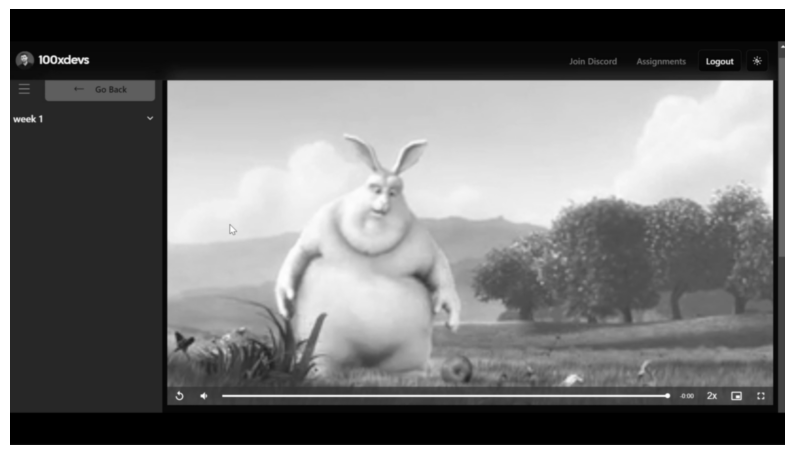

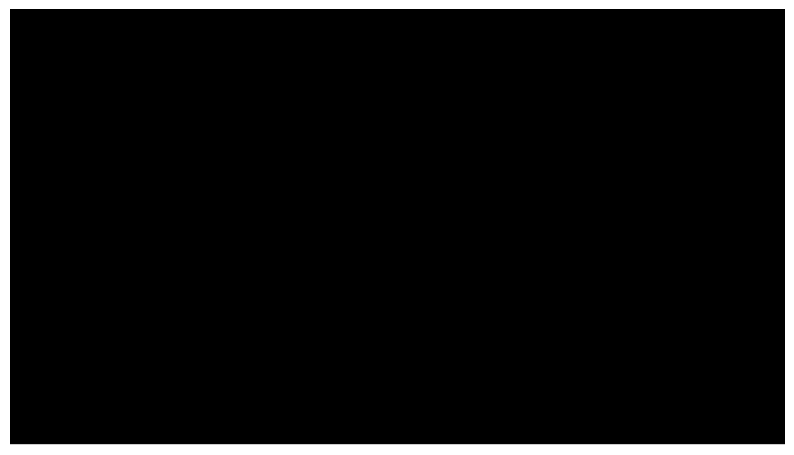

In [24]:
number=0
# highlighted_diff, isSignificant = highlight_frame_differences(cv2.cvtColor(frames1[number], cv2.COLOR_BGR2GRAY), cv2.cvtColor(frames2[number], cv2.COLOR_BGR2GRAY))
highlighted_diff, isSignificant = highlight_frame_differences(frames1[number], frames2[number])

if np.any(highlighted_diff > 0):
    print("There are values greater than 0 in the array.")
    count_greater_than_0 = np.sum(highlighted_diff > 0)
    print(f"Count of values greater than 0: {count_greater_than_0}")

# print(highlighted_diff[1079])
# display_cv2_img(cv2.cvtColor(frames1[number], cv2.COLOR_BGR2GRAY), figsize=(10, 10))
# display_cv2_img(cv2.cvtColor(frames2[number], cv2.COLOR_BGR2GRAY), figsize=(10, 10))
# display_cv2_img(highlighted_diff, figsize=(10, 10))
display_cv2_img(frames1[number], figsize=(10, 10))
display_cv2_img(frames2[number], figsize=(10, 10))
display_cv2_img(highlighted_diff, figsize=(10, 10))
print(phash1[number], phash2[number],phash1[number]-phash2[number], isSignificant)


In [25]:
def upload_segment(segment_number):
    print("Upload file",segment_number)

In [26]:
# for i in range(0,len(frames1)):
i=0
while i<len(frames1):
    # number=i
    # highlighted_diff, isSignificant = highlight_frame_differences(cv2.cvtColor(frames1[i], cv2.COLOR_BGR2GRAY), cv2.cvtColor(frames2[i], cv2.COLOR_BGR2GRAY))
    highlighted_diff, isSignificant = highlight_frame_differences(frames1[i],frames2[i])
    # print(number)
    if isSignificant:
        print(i)

        upload_segment(i//300)
        # print(i)
        # display_cv2_img(highlighted_diff, figsize=(10, 10))
        i=(i+300)-(i%300)
        # print("Updated i= ",i)
    i+=1

3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant_pixels
3840 num_significant

In [27]:
# cap = cv2.VideoCapture('main_copy.mp4')
# ret, frame = cap.read()
# frame

In [28]:
# array_bytes = frame.tobytes()
# print(array_bytes)
# hash_object = hashlib.sha256(array_bytes)
# hash_digest = hash_object.hexdigest()

# print("Hash Digest:", hash_digest)
# frame.tobytes()
# stringFrame2=str(frame)
# print(stringFrame2)

In [29]:
# stringFrame1==stringFrame2

In [30]:
# hash_object = hashlib.md5(stringFrame1.encode())

# # Get the hexadecimal representation of the hash digest
# hash_digest = hash_object.hexdigest()
# print(hash_digest)
# hash_object2 = hashlib.md5(stringFrame2.encode())

# # Get the hexadecimal representation of the hash digest
# hash_digest2 = hash_object2.hexdigest()
# print(hash_digest2)

In [31]:
# cap2 = cv2.VideoCapture('main_edit.mp4')
# # Create an empty list to store hash digests
# hash_digests2 = []
# strings2=[]

# while cap2.isOpened():
#     # Read a frame
#     ret, frame = cap2.read()

#     # Check if the frame was read successfully
#     if not ret:
#         break  # Break the loop if the end of the video is reached

#     # Process the frame (you can perform any desired processing here)
#     # For example, display the frame
#     # array_bytes = frame.tobytes()
#     # hash_object = hashlib.sha256(array_bytes)
#     # hash_digest = hash_object.hexdigest()

#     my_string=str(frame)
#     strings2.append(my_string)
#     # Calculate hash using MD5 without encoding
#     hash_object = hashlib.md5(my_string.encode())

#     # Get the hexadecimal representation of the hash digest
#     hash_digest = hash_object.hexdigest()

#     hash_digests2.append(hash_digest)

#     # print("Hash Digest:", hash_digest)
#     # cv2.imshow('Video', frame)

In [32]:
strings1[1]

IndexError: list index out of range

In [ ]:
strings2[1]

'[[[ 0  0  0]\n  [ 0  0  0]\n  [ 0  0  0]\n  ...\n  [ 0  0  0]\n  [ 0  0  0]\n  [ 0  0  0]]\n\n [[ 0  0  0]\n  [ 0  0  0]\n  [ 0  0  0]\n  ...\n  [ 0  0  0]\n  [ 0  0  0]\n  [ 0  0  0]]\n\n [[ 0  0  0]\n  [ 0  0  0]\n  [ 0  0  0]\n  ...\n  [ 0  0  0]\n  [ 0  0  0]\n  [ 0  0  0]]\n\n ...\n\n [[ 1  1  1]\n  [ 1  1  1]\n  [ 1  1  1]\n  ...\n  [ 1  1  1]\n  [ 1  1  1]\n  [ 1  1  1]]\n\n [[ 0 11  0]\n  [ 0 11  0]\n  [ 0 11  0]\n  ...\n  [ 0 11  0]\n  [ 0 11  0]\n  [ 0 11  0]]\n\n [[14 40 18]\n  [14 40 18]\n  [14 40 18]\n  ...\n  [14 40 18]\n  [14 40 18]\n  [14 40 18]]]'

In [ ]:
len(hash_digests2)

685

In [ ]:
print(hash_digests1[0])
print(hash_digests2[0])

fcf72db83cfc9c29035fead0804f0fac
fcf72db83cfc9c29035fead0804f0fac


In [ ]:
hash_digests1

['fcf72db83cfc9c29035fead0804f0fac',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 

In [ ]:
hash_digests2

['fcf72db83cfc9c29035fead0804f0fac',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 'a19485d6edb9fb292a131fd71e28e526',
 

In [ ]:
for i in range(0, len(hash_digest)):
    if hash_digests1[i]!=hash_digests2[i]:
        print(i)

NameError: name 'hash_digest' is not defined